In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [32]:
#import pandas as pd # Importing the pandas library and aliasing it as 'pd'
data = pd.read_csv('sample_data/diabetic_data.csv') # Reading data from 'diabetic_data.csv' into a pandas DataFrame called 'data'

In [33]:
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

1. First we are trying to display the non-numeric (categorical or object data types) from the DataFrame.

In [34]:
# Select all columns that are non-numeric (categorical or object data types) from the DataFrame
non_numeric_columns = data.select_dtypes(exclude=['number']).columns

# Print the names of the non-numeric columns to understand which features need further preprocessing (e.g., encoding)
print(non_numeric_columns)

# Print the total number of non-numeric columns to get an overview of how many such features exist in the dataset
print(len(non_numeric_columns))


Index(['race', 'gender', 'age', 'weight', 'payer_code', 'medical_specialty',
       'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')
37


2. Now, we are trying to Count the number of null values in each column.

In [35]:
# Count the number of null values in each column
null_counts = data.isnull().sum()

# Get the names of columns with null values
columns_with_null = null_counts[null_counts > 0].index.tolist()

# Check for NaN values in each column
nan_counts = data.isna().sum()

# Get the names of columns with NaN values
columns_with_nan = nan_counts[nan_counts > 0].index.tolist()

# Combine the columns with null and NaN values
columns_with_missing = list(set(columns_with_null + columns_with_nan))

# Print the column name
print("Columns with missing values:")
for column in columns_with_missing:
    print(column)

Columns with missing values:
max_glu_serum
A1Cresult


In [36]:
data.shape

(101766, 50)

In [37]:
data.dtypes

,0
encounter_id,int64
patient_nbr,int64
race,object
gender,object
age,object
weight,object
admission_type_id,int64
discharge_disposition_id,int64
admission_source_id,int64
time_in_hospital,int64


3. Handling Imbalanced Columns

In the below code chunks in order to drop list with columns consisted with 80% or more of same values. Mostly null values.

In [38]:
# Create a copy of the dataset to avoid modifying the original data
X = data.copy()

# Separate the target variable (dependent variable) into y for prediction tasks
y = X['readmitted']

# Drop the 'weight' column (not needed for modeling) and the target column ('readmitted') from the features
X.drop(['weight', 'readmitted','encounter_id','patient_nbr','payer_code'], axis=1, inplace=True)

# Initialize an empty list to store column names that will be dropped
# These columns have 80% or more of the same value, which could indicate low variance or mostly null values
drop_list = []

# Iterate through each column in the dataset
for col in X.columns:
    # Replace specific placeholders or missing value indicators with `None` for standard null handling
    X.loc[:, col] = X.loc[:, col].replace('?', None)  # Handling '?' as missing values
    X.loc[:, col] = X.loc[:, col].replace('No', 0)    # Replace 'No' with 0 for binary encoding
    X.loc[:, col] = X.loc[:, col].replace('None', 0)  # Replace 'None' with 0 for binary encoding

    # Calculate the value counts for the column
    val_counts = X[col].value_counts()

    # Check if the most frequent value constitutes more than 80% of the column's total values
    if val_counts.iloc[0] / val_counts.sum() > 0.8:
        # If yes, add the column name to the drop list
        drop_list.append(col)

# Iterate through the drop list and remove these columns from the dataset
for elem in drop_list:
    X.drop([elem], axis=1, inplace=True)

# Return or display the updated feature set after preprocessing
X


<ipython-input-38-8736072d5b12>:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X.loc[:, col] = X.loc[:, col].replace('No', 0)    # Replace 'No' with 0 for binary encoding
<ipython-input-38-8736072d5b12>:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X.loc[:, col] = X.loc[:, col].replace('No', 0)    # Replace 'No' with 0 for binary encoding


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,insulin,change,diabetesMed
0,Caucasian,Female,[0-10),6,25,1,1,Pediatrics-Endocrinology,41,0,...,0,250.83,None,None,1,NaN,NaN,0,0,0
1,Caucasian,Female,[10-20),1,1,7,3,None,59,0,...,0,276,250.01,255,9,NaN,NaN,Up,Ch,Yes
2,AfricanAmerican,Female,[20-30),1,1,7,2,None,11,5,...,1,648,250,V27,6,NaN,NaN,0,0,Yes
3,Caucasian,Male,[30-40),1,1,7,2,None,44,1,...,0,8,250.43,403,7,NaN,NaN,Up,Ch,Yes
4,Caucasian,Male,[40-50),1,1,7,1,None,51,0,...,0,197,157,250,5,NaN,NaN,Steady,Ch,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),1,3,7,3,None,51,0,...,0,250.13,291,458,9,NaN,>8,Down,Ch,Yes
101762,AfricanAmerican,Female,[80-90),1,4,5,5,None,33,3,...,1,560,276,787,9,NaN,NaN,Steady,0,Yes
101763,Caucasian,Male,[70-80),1,1,7,1,None,53,0,...,0,38,590,296,13,NaN,NaN,Down,Ch,Yes
101764,Caucasian,Female,[80-90),2,3,7,10,Surgery-General,45,2,...,1,996,285,998,9,NaN,NaN,Up,Ch,Yes


4. Target Variable Preparation and Feature Transformation

In [39]:
import warnings

# Suppress specific warnings for cleaner outputs during preprocessing
warnings.filterwarnings("ignore", category=FutureWarning, module="pandas")  # Ignore FutureWarnings from pandas
warnings.filterwarnings("ignore", message="A value is trying to be set on a copy")  # Ignore specific SettingWithCopyWarning

# Prepare the target variable 'y' by converting categorical values into integers for machine learning models
y.replace('>30', 2, inplace=True)  # Replace '>30' with 2 (indicating readmission after 30 days)
y.replace('<30', 1, inplace=True)  # Replace '<30' with 1 (indicating readmission within 30 days)
y.replace('NO', 0, inplace=True)   # Replace 'NO' with 0 (indicating no readmission)

# Prepare the 'age' column by converting categorical age ranges into numerical values
for val in list(set(X['age'].values)):
    if isinstance(val, str):  # Ensure the value is a string before slicing
        X['age'].replace(val, val[-3:-1], inplace=True)  # Extract the upper limit of the range as a string
    else:
        pass  # No action needed for non-string values

# Replace '00' (resulting from [0-10)) with 100 for consistency
X['age'].replace('00', 100, inplace=True)

# Convert the cleaned age values into integers for numerical analysis
for val in list(set(X['age'].values)):
    X['age'].replace(val, int(val), inplace=True)

# Prepare the 'insulin' column by encoding categorical values into integers
X['insulin'].replace('Down', -1, inplace=True)  # -1 indicates decreasing insulin levels
X['insulin'].replace('No', 0, inplace=True)     # 0 indicates no insulin prescription
X['insulin'].replace('Steady', 1, inplace=True) # 1 indicates steady insulin levels
X['insulin'].replace('Up', 2, inplace=True)     # 2 indicates increasing insulin levels

# Encode the 'change' column to represent whether a change in diabetes medication occurred
X['change'].replace('Ch', 1, inplace=True)  # 1 indicates a change
X['change'].replace('No', 0, inplace=True)  # 0 indicates no change

# Encode the 'diabetesMed' column to indicate whether the patient is on diabetes medication
X['diabetesMed'].replace('No', 0, inplace=True)  # 0 indicates no medication
X['diabetesMed'].replace('Yes', 1, inplace=True) # 1 indicates medication is prescribed

# Handle 'diag_1', 'diag_2', and 'diag_3' columns to address non-numeric and irrelevant codes
# Replace diagnoses that start with alphabetic characters (non-numeric values) with None
for val in list(set(X['diag_1'].values)):
    if isinstance(val, str) and val is not None and val[0].isalpha():
        X['diag_1'].replace(val, None, inplace=True)  # Replace irrelevant entries with None
    else:
        pass  # Keep numeric or valid entries as-is

# Repeat similar preprocessing for 'diag_2' and 'diag_3' columns
for val in list(set(X['diag_2'].values)):
    if isinstance(val, str) and val is not None and val[0].isalpha():
        X['diag_2'].replace(val, None, inplace=True)
    else:
        pass

for val in list(set(X['diag_3'].values)):
    if isinstance(val, str) and val is not None and val[0].isalpha():
        X['diag_3'].replace(val, None, inplace=True)
    else:
        pass


<ipython-input-39-41b4a6f88671>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y.replace('NO', 0, inplace=True)   # Replace 'NO' with 0 (indicating no readmission)
<ipython-input-39-41b4a6f88671>:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['age'].replace(val, int(val), inplace=True)
<ipython-input-39-41b4a6f88671>:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the futu

5. Encoding Categorical Variables

In [40]:
# Define the mapping of categories to numerical values
# age_mapping = {'[0-10)': 1, '[10-20)': 2, '[20-30)': 3, '[30-40)': 4, '[40-50)': 5,
#                '[50-60)': 6, '[60-70)': 7, '[70-80)': 8, '[80-90)': 9, '[90-100)': 10}

# # Replace the categorical values with numerical values using the mapping
# X['age'] = X['age'].replace(age_mapping)
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder instance
le = LabelEncoder()

# Loop through each column in the dataset
for col in X.columns:
    # Check if the column is of object type (categorical data)
    if X.dtypes[col] == object:
        # Apply Label Encoding to convert categorical values into numerical values
        X[col] = le.fit_transform(X[col])

# The loop ensures all object-type columns are encoded, making them compatible with ML algorithms


6. Handling Missing Values

In [41]:
# Fill missing values in the dataset
X.fillna(X.mean(), inplace=True)

In [42]:
# Provides the dimensions of the DataFrame X as a tuple (number of rows, number of columns).
X.shape

(101766, 21)

In [43]:
# Provides the datatypes of the DataFrame X
X.dtypes

,0
race,int64
gender,int64
age,int64
admission_type_id,int64
discharge_disposition_id,int64
admission_source_id,int64
time_in_hospital,int64
medical_specialty,int64
num_lab_procedures,int64
num_procedures,int64


In [44]:
X

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,insulin,change,diabetesMed
0,2,0,10,6,25,1,1,37,41,0,...,0,124,650,670,1,3,3,0,0,0
1,2,0,20,1,1,7,3,72,59,0,...,0,143,79,121,9,3,3,2,1,1
2,0,0,30,1,1,7,2,72,11,5,...,1,454,78,670,6,3,3,0,0,1
3,2,1,40,1,1,7,2,72,44,1,...,0,554,97,248,7,3,3,2,1,1
4,2,1,50,1,1,7,1,72,51,0,...,0,54,24,86,5,3,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,0,1,80,1,3,7,3,72,51,0,...,0,102,148,295,9,3,1,-1,1,1
101762,0,0,90,1,4,5,5,72,33,3,...,1,381,133,536,9,3,3,1,0,1
101763,2,1,80,1,1,7,1,72,53,0,...,0,236,389,159,13,3,3,-1,1,1
101764,2,0,90,2,3,7,10,62,45,2,...,1,693,142,668,9,3,3,2,1,1


7. Feature Scaling

In [45]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Initialize the scaler (choose one based on your model's requirement)
scaler = StandardScaler()  # Standardizes to mean=0, std=1
# scaler = MinMaxScaler()  # Scales data between 0 and 1

# Get numeric columns excluding 'gender' and 'age'
numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns

numeric_columns = numeric_columns.difference(['gender', 'age'])

# Apply scaling only to the remaining numeric columns
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])


8. Outlier Treatment
We are using interquartile range (IQR) to detect and optionally cap outliers.

In [46]:
# Define a function to cap outliers
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower_bound, upper_bound)

# Apply the function to numeric columns
for col in numeric_columns:
    cap_outliers(X, col)


For diabetes prediction, it's important to select features that are most likely to influence the presence or absence of diabetes. Based on the list you provided, here are the most relevant features to consider for a diabetes prediction mode

1. Demographic Features
age: Age is a key factor in diabetes diagnosis, as older individuals are at higher risk for developing diabetes.
gender: Gender can influence diabetes risk, although it might not be as strong as other features.

2. Medical History Features
admission_type_id: This could indicate the severity of the medical condition when a patient is admitted, which may correlate with diabetes complications.
discharge_disposition_id: Could give insight into patient outcomes, which might relate to diabetes-related complications.
admission_source_id: The source of admission (e.g., emergency, outpatient, etc.) may indicate the urgency and nature of the health issue, potentially affecting diabetes care.
time_in_hospital: A longer hospital stay could indicate complications from diabetes or other comorbidities, so it’s relevant.
num_lab_procedures: A higher number of lab procedures might indicate regular monitoring, which is relevant for diabetes.
num_procedures: The number of medical procedures could suggest the severity of diabetes-related complications.
num_medications: More medications may suggest management of diabetes or related health issues.
3. Diagnosis-Related Features
diag_1, diag_2, diag_3: Diagnoses related to diabetes or its complications (e.g., type 2 diabetes, hypertension, kidney disease) are important indicators of diabetes.
number_diagnoses: The number of diagnoses could suggest the severity or presence of other conditions related to diabetes, such as hypertension or heart disease.
4. Diabetes Management Features
max_glu_serum: This is a direct indicator of blood glucose levels, which is highly relevant to diabetes diagnosis.
A1Cresult: A1C levels are directly related to diabetes diagnosis and management, making it one of the most important features.
insulin: The type of insulin regimen a patient is on (e.g., "No", "Down", "Steady", "Up") can indicate how well-controlled their diabetes is.
change: Indicates whether there has been a change in diabetes treatment, which could reflect changes in the patient's health status.
diabetesMed: Whether the patient is on diabetes medication ("Yes" or "No") is a direct indicator of their diabetes management.

In [47]:
# List of relevant features for diabetes prediction
diabetes_features = [
    'age', 'gender', 'admission_type_id', 'discharge_disposition_id',
    'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
    'num_procedures', 'num_medications', 'diag_1', 'diag_2', 'diag_3',
    'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'insulin',
    'change', 'diabetesMed'
]

# Selecting relevant features from the dataset
X_diabetes = X[diabetes_features]


In [48]:
from sklearn.feature_selection import VarianceThreshold

# Set a threshold for variance (e.g., 0.01)
var_thresh = VarianceThreshold(threshold=0.01)
X_low_variance = var_thresh.fit_transform(X)

# Get selected feature names
selected_features = X.columns[var_thresh.get_support()]
X = X[selected_features]


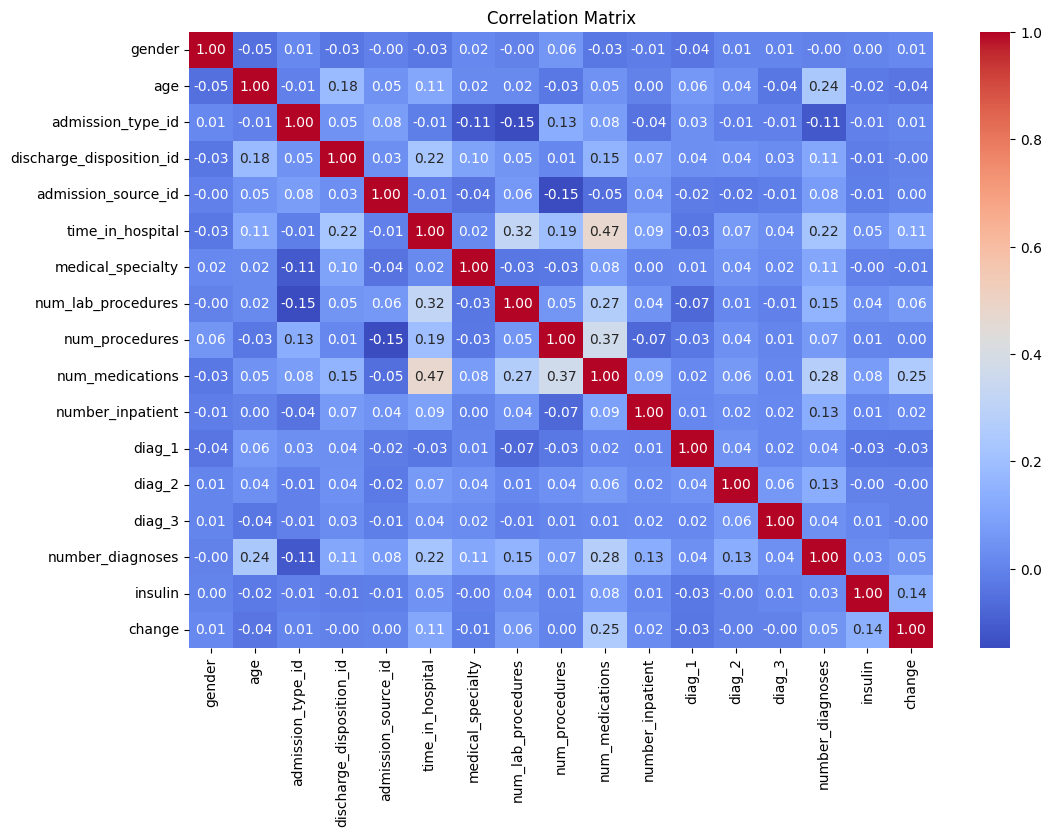

<ipython-input-49-6e06decf055d>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(labels=correlated_features, axis=1, inplace=True)


In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix for numerical features
correlation_matrix = X.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Drop highly correlated features (e.g., correlation > 0.85)
correlated_features = set()
correlation_threshold = 0.85
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            correlated_features.add(correlation_matrix.columns[i])

X.drop(labels=correlated_features, axis=1, inplace=True)


8. Data Splitting

In [50]:
from sklearn.model_selection import train_test_split

# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
X_train.shape

(81412, 17)

In [52]:
y_train.shape

(81412,)

9. Exporting the Preprocessed Data

In [54]:
# Converts the DataFrame X into a CSV file format and saves it to the specified file name
X.to_csv('preprocessed_cdata.csv', index=False)
